# Coupon Collector Problem
## Introduction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random 
import pandas as pd

In [45]:
coupons = []
uniques = []
winners = []
purchases = []

In [88]:
# Generate the winning set of coupons
def generate_winning_set(num_uniques):
    for coupon in range(num_uniques):
        winners.append(coupon + 1)
    return winners

# Buy an ice cream and collect the corresponding coupon
def buy_ice_cream(num_uniques):
    coupon = random.randint(1, num_uniques)
    coupons.append(coupon)
    return coupons

# Find the unique coupons collected 
def check_coupons(coupons):
    for coupon in coupons:
        if coupon not in uniques:
            uniques.append(coupon)
    return uniques

# Function to clear lists to start a new game
def clear_lists():
    coupons.clear()
    uniques.clear()
    winners.clear()
    
# Play the coupon collector game 
def play_game(num_uniques):
    # Every game is considered a 'new game' so we need to clear the lists
    clear_lists()
    
    # Used as a counter for the total purchases to win the game. 
    total_purchases = 0
    
    # Generate winning tickets
    winners = generate_winning_set(num_uniques)
    
    # Buy ice creams until the set of winning tickets is collected. 
    while uniques != winners:
        # collect a coupon
        buy_ice_cream(num_uniques)
        
        # Increase counter by 1
        total_purchases += 1
        
        # filter the coupons
        check_coupons(coupons)
        
        # sort the coupons
        uniques.sort()
        
        # If the uniques equals the winning set, the costumer won the prize
        if(uniques == winners):
            purchases.append(total_purchases)
            break
            
def gather_game_data(num_unique, trial_amount):
    purchases.clear()
    trials = [num_unique] * trial_amount
    for trial in trials:
        play_game(trial)
    purchases.sort()
    minimum = purchases[0]
    maximum = purchases[trial_amount - 1]
    mean = sum(purchases) / len(purchases)  
    var = sum([((x - mean) ** 2) for x in purchases]) / len(purchases)
    res = var ** 0.5
    data = {'Needed': num_unique, 'Trials': trial_amount, 'Mean': mean, 'Variance': var, "Residual": res,
           "Minimum": minimum, "Maximum": maximum}
    data_items = data.items()
    data_list = list(data_items)
    return data_list

def gather_all_games_data(num_unique, trial_amount):
    print("")
    

In [89]:
gather_game_data(num_unique = 70, trial_amount = 100)

[('Needed', 70),
 ('Trials', 100),
 ('Mean', 336.15),
 ('Variance', 6771.2675),
 ('Residual', 82.28771171930838),
 ('Minimum', 168),
 ('Maximum', 606)]

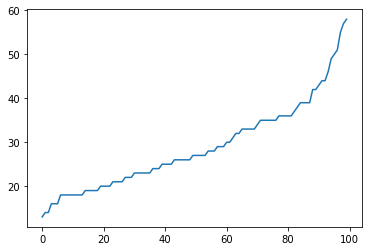